# "Esports: Game and Gain - Analyzing Earnings and Industry Growth"

## introduction :

Esports is competitive gaming at a professional level, where players and teams compete in video games. It has gained global popularity and features a variety of game genres. Professional esports teams participate in organized leagues and tournaments with substantial prize pools. Esports events are held in arenas and streamed online, attracting millions of viewers. The industry has created opportunities for many people and continues to grow in the world of entertainment.

**This project** will conduct an **exploratory data analysis (EDA)** of the Esports industry.
**The goal** is to uncover interesting insights and trends by examining earnings over the years, game genres,and players, and to provide valuable insights into the dynamic and rapidly growing world of competitive gaming.

the dataset is from [EsportsEarnings.com](https://www.esportsearnings.com/)

The dataset offers data and statistics on earnings in the esports industry over the years. It provides valuable pros, including comprehensive data, rankings, and historical information, making it an accessible and valuable resource for exploring the financial aspects of the industry. However, a potential limitation is that the site relies on reported data, which may not always be entirely reliable.

In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


After importing the libraries, lets start with loading the datasets :

In [2]:
# Load and inspect the data
games = pd.read_csv('GeneralEsportData.csv')
earning = pd.read_csv('HistoricalEsportData.csv')

print(games.head())
print(earning.head())

                    Game  ReleaseDate     Genre  TotalEarnings  \
0         Age of Empires         1997  Strategy      460830.69   
1      Age of Empires II         1999  Strategy     3042871.76   
2     Age of Empires III         2005  Strategy      113893.65   
3      Age of Empires IV         2021  Strategy      893245.17   
4  Age of Empires Online         2011  Strategy        8646.56   

   OnlineEarnings  TotalPlayers  TotalTournaments  
0       334217.32           407               227  
1      1129627.41          1869              1481  
2        41800.00           155               141  
3       408517.49           442               275  
4          775.00            42                43  
         Date        Game  Earnings  Players  Tournaments
0  1998-01-01  QuakeWorld   15000.0        8            1
1  1998-05-01    Quake II   14600.0        4            1
2  1998-05-01  QuakeWorld     300.0        3            1
3  1998-07-01    Quake II    6500.0        4            1
4

The datasets contain two tables. 

1. "games" - Contains information about games (7 columns): 
* Game: The name of the game.
* ReleaseDate: The year when the game was released.
* Genre: Genre of the game.
* TotalEarnings: The total earnings of the game in US dollars.
* OnlineEarnings: The earnings of the game through online in US dollars.
* TotalPlayers: The total number of players of the game.
* TotalTournaments: The total number of tournaments held for the game.

2. "earnings" - Contains information about tournaments (5 columns): 
* Date: The date when the tournaments took place.
* Game: The name of the game associated with the tournaments.
* Earnings: The earnings from the tournaments.
* Players: The number of players who participated in the tournaments.
* Tournament: The number of tournaments held for the game on that specific date.



## Data Wrangling and Cleaning :

In [3]:
# Checking the summary of the DataFrames
print(games.info())
print(earning.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Game              631 non-null    object 
 1   ReleaseDate       631 non-null    int64  
 2   Genre             631 non-null    object 
 3   TotalEarnings     631 non-null    float64
 4   OnlineEarnings    631 non-null    float64
 5   TotalPlayers      631 non-null    int64  
 6   TotalTournaments  631 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 34.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8751 entries, 0 to 8750
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         8751 non-null   object 
 1   Game         8751 non-null   object 
 2   Earnings     8751 non-null   float64
 3   Players      8751 non-null   int64  
 4   Tournaments  8751 non-null   int64  
dtype

It seems like the datasets are complete! 
From getting familiar with the data, the data types seem ok and there no need to change them.

In [4]:
# Checking the numerical columns
print(games.describe())


       ReleaseDate  TotalEarnings  OnlineEarnings  TotalPlayers  \
count   631.000000   6.310000e+02    6.310000e+02    631.000000   
mean   2012.388273   2.374446e+06    1.673982e+06    218.179081   
std       7.342405   1.658221e+07    1.313584e+07    925.708483   
min    1981.000000   0.000000e+00    0.000000e+00      0.000000   
25%    2007.000000   1.000000e+03    0.000000e+00      4.000000   
50%    2015.000000   3.220846e+04    1.175000e+04     20.000000   
75%    2018.000000   2.469336e+05    1.496728e+05     97.000000   
max    2022.000000   3.149158e+08    2.814063e+08  15741.000000   

       TotalTournaments  
count        631.000000  
mean          91.419968  
std          465.304273  
min            0.000000  
25%            1.000000  
50%            5.000000  
75%           27.500000  
max         7059.000000  


In [5]:
#Checking if there are any missing values in the table 
games.isnull().sum()
#games[games.isnull().any(axis=1)]

Game                0
ReleaseDate         0
Genre               0
TotalEarnings       0
OnlineEarnings      0
TotalPlayers        0
TotalTournaments    0
dtype: int64

In [6]:
# Adding a year column to the DateFrame
earning["Year"] = pd.DatetimeIndex(earning["Date"]).year
print(earning.head())

         Date        Game  Earnings  Players  Tournaments  Year
0  1998-01-01  QuakeWorld   15000.0        8            1  1998
1  1998-05-01    Quake II   14600.0        4            1  1998
2  1998-05-01  QuakeWorld     300.0        3            1  1998
3  1998-07-01    Quake II    6500.0        4            1  1998
4  1998-11-01    Quake II   36600.0       13            2  1998


In [7]:
# Checking the different Genres
print("The number of genres: " + str(games['Genre'].nunique()))
print(games['Genre'].unique())

# Changing the names so it won't be too long 
games = games.apply(lambda x: x.replace({'Multiplayer Online Battle Arena':'MOBA', 'Third-Person Shooter':'TPS', "Role-Playing": 'RPG', "First-Person Shooter": "FPS"}, regex=True))


The number of genres: 12
['Strategy' 'First-Person Shooter' 'Multiplayer Online Battle Arena'
 'Role-Playing Game' 'Fighting Game' 'Racing' 'Sports'
 'Collectible Card Game' 'Puzzle Game' 'Battle Royale'
 'Third-Person Shooter' 'Music / Rhythm Game']


Now I want to combine the two datasets into one : 


In [8]:
# Joining the Datasets into one 
games_earning = earning.merge(games[['Game','Genre','ReleaseDate']], how = 'left', on = 'Game')
print(games_earning.head())

         Date        Game  Earnings  Players  Tournaments  Year Genre  \
0  1998-01-01  QuakeWorld   15000.0        8            1  1998   FPS   
1  1998-05-01    Quake II   14600.0        4            1  1998   FPS   
2  1998-05-01  QuakeWorld     300.0        3            1  1998   FPS   
3  1998-07-01    Quake II    6500.0        4            1  1998   FPS   
4  1998-11-01    Quake II   36600.0       13            2  1998   FPS   

   ReleaseDate  
0         1996  
1         1997  
2         1996  
3         1997  
4         1997  


In [9]:
# Creating a Dictionary for popular games using their more familiar names 
replace_names_dict = {
    "PLAYERUNKNOWN'S BATTLEGROUNDS Mobile": 'PUBG mobile',
    "PLAYERUNKNOWN’S BATTLEGROUNDS": 'PUBG',
    "Counter-Strike: Global Offensive": 'Counter-Strike'
}

# Replacing values from the Dictionary in the Dataset
games_earning['Game'] = games_earning['Game'].replace(replace_names_dict)

After creating a table, I would like to filter the rows that have zero earnings or zero players.

In [10]:
# Filtering the rows 
games_earning = games_earning.loc[(games_earning["Earnings"]>0) & (games_earning["Players"]>0) ] 

In [11]:
# Creating a Pivot table 
games_earning_pivot = pd.DataFrame()
games_earning_pivot = pd.pivot_table(games_earning, values = ['Genre', 'Players', 'Tournaments', 'Earnings','ReleaseDate'],\
                                     index = ['Game', 'Year'], aggfunc = {'Genre': 'first', 'Players' : 'sum', 'Tournaments':'sum', 'Earnings':'sum', 'ReleaseDate':'first'})
games_earning_pivot.reset_index(inplace=True)

print(games_earning_pivot.head(10))

                       Game  Year  Earnings          Genre  Players  \
0                      ARMS  2017   3392.10  Fighting Game       47   
1                      ARMS  2018  13073.14  Fighting Game      161   
2                      ARMS  2019   2470.86  Fighting Game       54   
3                      ARMS  2020   1619.86  Fighting Game       35   
4                      ARMS  2021   1146.50  Fighting Game       21   
5                      ARMS  2022    200.00  Fighting Game        6   
6  Acceleration of SUGURI 2  2019    210.00  Fighting Game        3   
7  Acceleration of SUGURI 2  2020    100.00  Fighting Game        3   
8  Acceleration of SUGURI 2  2021    100.00  Fighting Game        3   
9                   After-H  2021  15049.26            FPS       57   

   ReleaseDate  Tournaments  
0         2017           19  
1         2017           56  
2         2017           14  
3         2017            7  
4         2017            6  
5         2017            2  
6       

## Exploratory Data Analysis (EDA) :

In this part, I would like to reveal insights and trends in earnings, tournaments, and the popularity of games/genres in the Esports industry. <br>
The analysis aims to address key questions related to these aspects and to provide a deeper understanding of the industry.

#### 1. Total Earnings in the Last 10 Years

First, let's see how much money (in USD) Esports made in the last ten years.

In [12]:
# Calculating earnings by year
earning_by_year = games_earning_pivot[['Earnings', 'Year']].groupby('Year').sum()

# Converting earnings to millions and data type to integer
earning_by_year['Earnings'] = round(earning_by_year['Earnings']/1000000)
earning_by_year['Earnings'] = earning_by_year['Earnings'].astype(int)
earning_by_year.reset_index(inplace=True)

# Uncomment to print the new DataFrame
#print(earning_by_year)

# Filter by the years 2013 to 2022
filter_earning_by_year = earning_by_year[(earning_by_year['Year'] >= 2013) & (earning_by_year['Year'] <= 2022)]

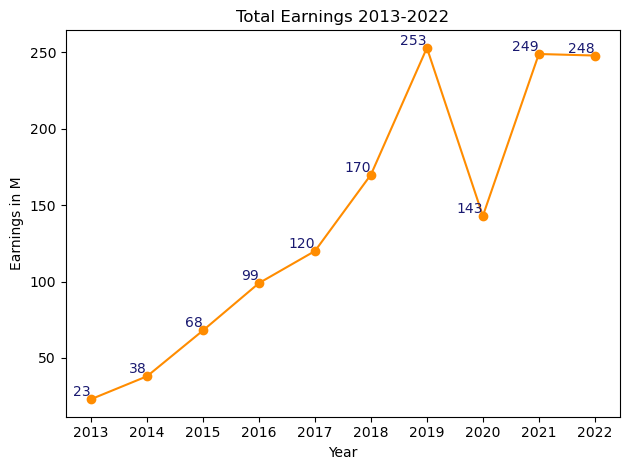

In [13]:
# Making a line plot

fig, ax = plt.subplots()
plt.plot(filter_earning_by_year['Year'], filter_earning_by_year['Earnings'], marker = 'o', color='darkorange')
ax.set_xlabel('Years')
ax.set_ylabel('Earnings')
plt.xticks(filter_earning_by_year['Year'], filter_earning_by_year['Year'])

for x, y in zip(filter_earning_by_year['Year'], filter_earning_by_year['Earnings']):
    plt.text(x, y, f'{y}', ha='right', va='bottom', color='midnightblue')

plt.title('Total Earnings 2013-2022')
plt.xlabel('Year')
plt.ylabel('Earnings in M')
plt.tight_layout()
    
plt.show()

As we can see in the line plot, the total earnings of the industry were **growing** every year, and in the year **2019**, it reached a peak of **\$253M** (11 times more than the year **2013**!).<br> 
We can also observe a decrease in the year **2020**, which can be attributed to the global impact of the **COVID-19** pandemic, affecting numerous industries. However, in the two years post-pandemic, we can see a recovery in earnings, and I believe that it will continue to grow even more in the coming years.

#### 2. Top 10 Games Earnings 

Second, let's find out the top 10 games with the highest earnings (in USD).

In [14]:
# Calculating earnings per game
earning_per_game = games_earning_pivot.groupby('Game').agg({'Genre': 'first','ReleaseDate': 'first', 'Earnings': 'sum'}).sort_values('Earnings', ascending = False)
earning_per_game['Earnings'] = round(earning_per_game['Earnings']/1000000)
earning_per_game.reset_index(inplace=True)

# Printing the top 10 games
print(earning_per_game.head(10))

                Game          Genre  ReleaseDate  Earnings
0             Dota 2           MOBA         2013     315.0
1     Counter-Strike            FPS         2000     164.0
2           Fortnite  Battle Royale         2017     155.0
3  League of Legends           MOBA         2009     102.0
4     Arena of Valor           MOBA         2015      80.0
5        PUBG mobile  Battle Royale         2017      63.0
6               PUBG  Battle Royale         2017      53.0
7       StarCraft II       Strategy         2010      39.0
8  Rainbow Six Siege            FPS         2015      36.0
9          Overwatch            FPS         2016      35.0


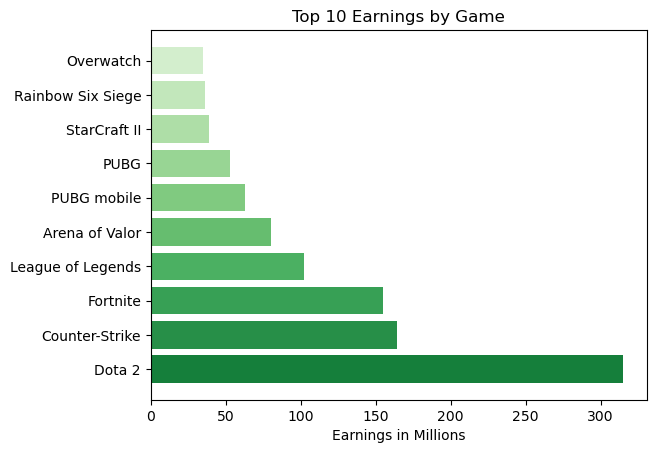

In [15]:
# Creating a horizontal bar chart

cmap = plt.cm.get_cmap('Greens')  
colors = cmap(np.linspace(0.8, 0.2, 10)) 

plt.barh(earning_per_game['Game'].head(10), earning_per_game['Earnings'].head(10), color = colors)
plt.xlabel('Earnings in Millions')
plt.title('Top 10 Earnings by Game')
plt.show()

The top-earning game is **Dota 2**, which was released in 2013, with total earnings of **\$315M**. <br>
It is interesting to note that the **top** four games on the list have each earned more than **\$100M**. <br>
Another interesting insight is that **Fortnite**,the latest game on the list released in 2017, has earned nearly the same as **Counter-Strike**, which was released back in 2000. <br> 
Despite its early release, **Counter-Strike** is still very popular game among players. <br>
Ultimately, most of the games on this list were released from **2013** onwards, which show the growth of the esports industry in recent years. 

#### 3.  Top 10 Games' Earnings in the Last 5 Years

Next, let's explore the earnings of the top 10 games over the last five years, so we may identify any specific trends or patterns.

In [16]:
# Creating top 10 games list 
top_10 = earning_per_game['Game'].head(10)
print(top_10)

games_earning_pivot['Earnings'] = round(games_earning_pivot['Earnings']/1000000)

0               Dota 2
1       Counter-Strike
2             Fortnite
3    League of Legends
4       Arena of Valor
5          PUBG mobile
6                 PUBG
7         StarCraft II
8    Rainbow Six Siege
9            Overwatch
Name: Game, dtype: object


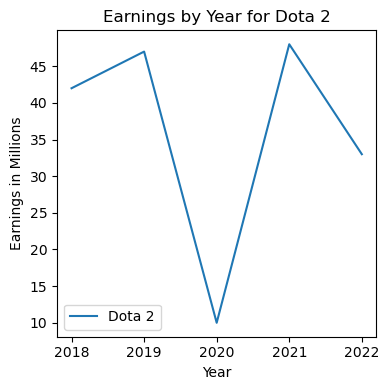

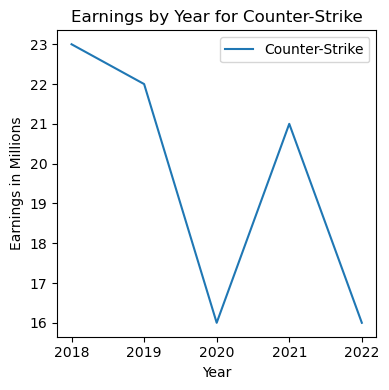

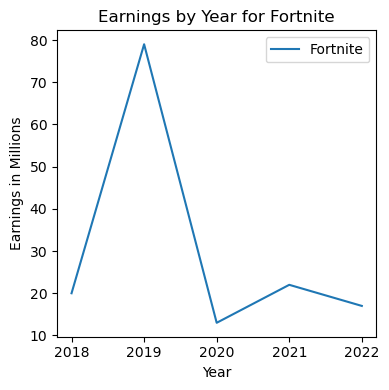

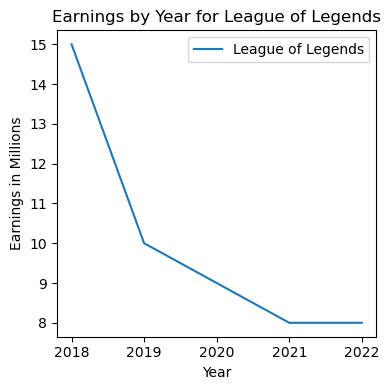

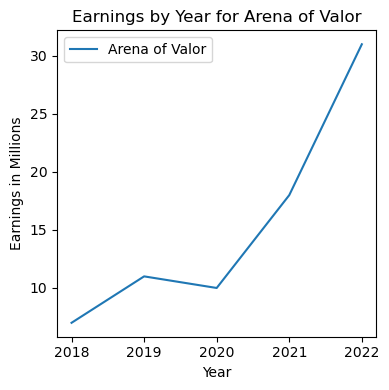

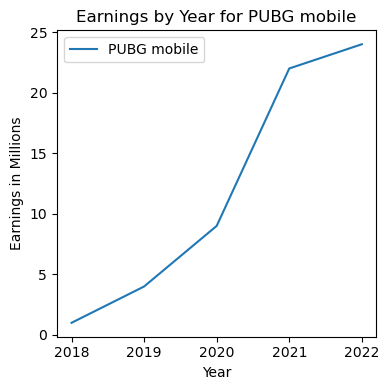

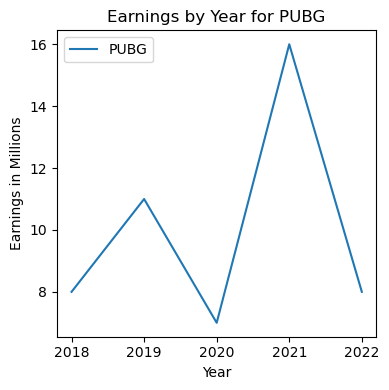

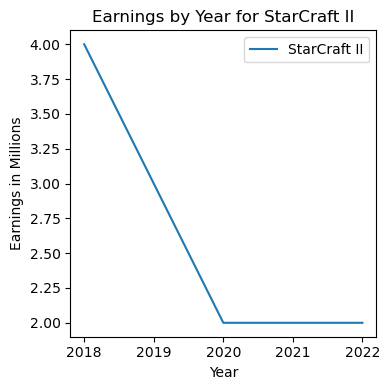

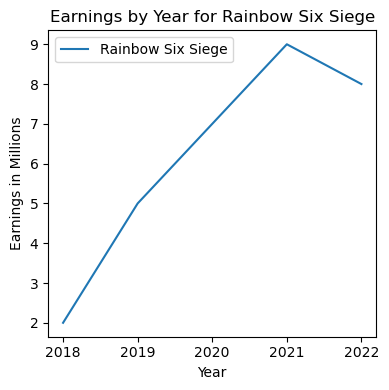

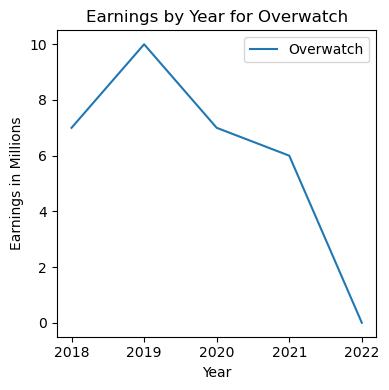

In [17]:
# Loop that select each game from the list in the last 5 years
for game in top_10 : 
    game_last_years = games_earning_pivot[(games_earning_pivot['Game'] == game) & (games_earning_pivot['Year'].between(2018,2022))]
    #print(game_last_years)
    
    fig, ax = plt.subplots(figsize=(4, 4))
    
    plt.plot(game_last_years['Year'], game_last_years['Earnings'], label = game)
    ax.set_xlabel('Year')
    ax.set_ylabel('Earnings in Millions')
    ax.set_title('Earnings by Year for {}'.format(game) )
    ax.legend()

    plt.tight_layout()
    
    plt.show()

The different plots show various trends:
- Most of the games show an **increase** from **2018** to the following year **2019**.
- In **2020**, we can see that most of the games earned **less** than the previous years due to **COVID-19**. The **exception** is **PUBG Mobile**, and it's probably related to the fact that players could still participate in tournaments despite the global pandemic.
- Most of the games show **recovery** in **2021**, post-pandemic. Some even reach their **peak earnings** (Dota 2, PUBG, Rainbow Six Siege).
- The games show **differences** in **2022** - some continue to **grow** (like Arena of Valor), some **decline** (like Counter-Strike and Fortnite), and some remain **stable** (like StarCraft II). With each passing year, new games from different genres offer players bigger prizes and opportunities, contributing to the industry's competition and growth.
- By analyzing the plots **individually**, we can observe that the difference over the last two years is **insignificant**, and the top 10 games still earn a lot and control the market. This may be related to the genre of the game, market competition, releasing new content or updates for the game, and other factors.


#### 4. Top 10 Games' Tournaments in the Last 5 Years 

Next, let's see how many tournaments each game had in the last 5 years :

In [18]:
# Creating a new DataFrame
years_18_22 = pd.DataFrame()

# Loop that select each game from the list in the last 5 years
for game in top_10 :
    tournamnet_per_year = games_earning_pivot[(games_earning_pivot['Game'] == game) & (games_earning_pivot['Year'].between(2018,2022))]
    years_18_22 = pd.concat([years_18_22, tournamnet_per_year])


years_18_22 = years_18_22.sort_values(['Year', 'Game'])
years_18_22.reset_index(inplace=True, drop =True)
#print(years_18_22.info())

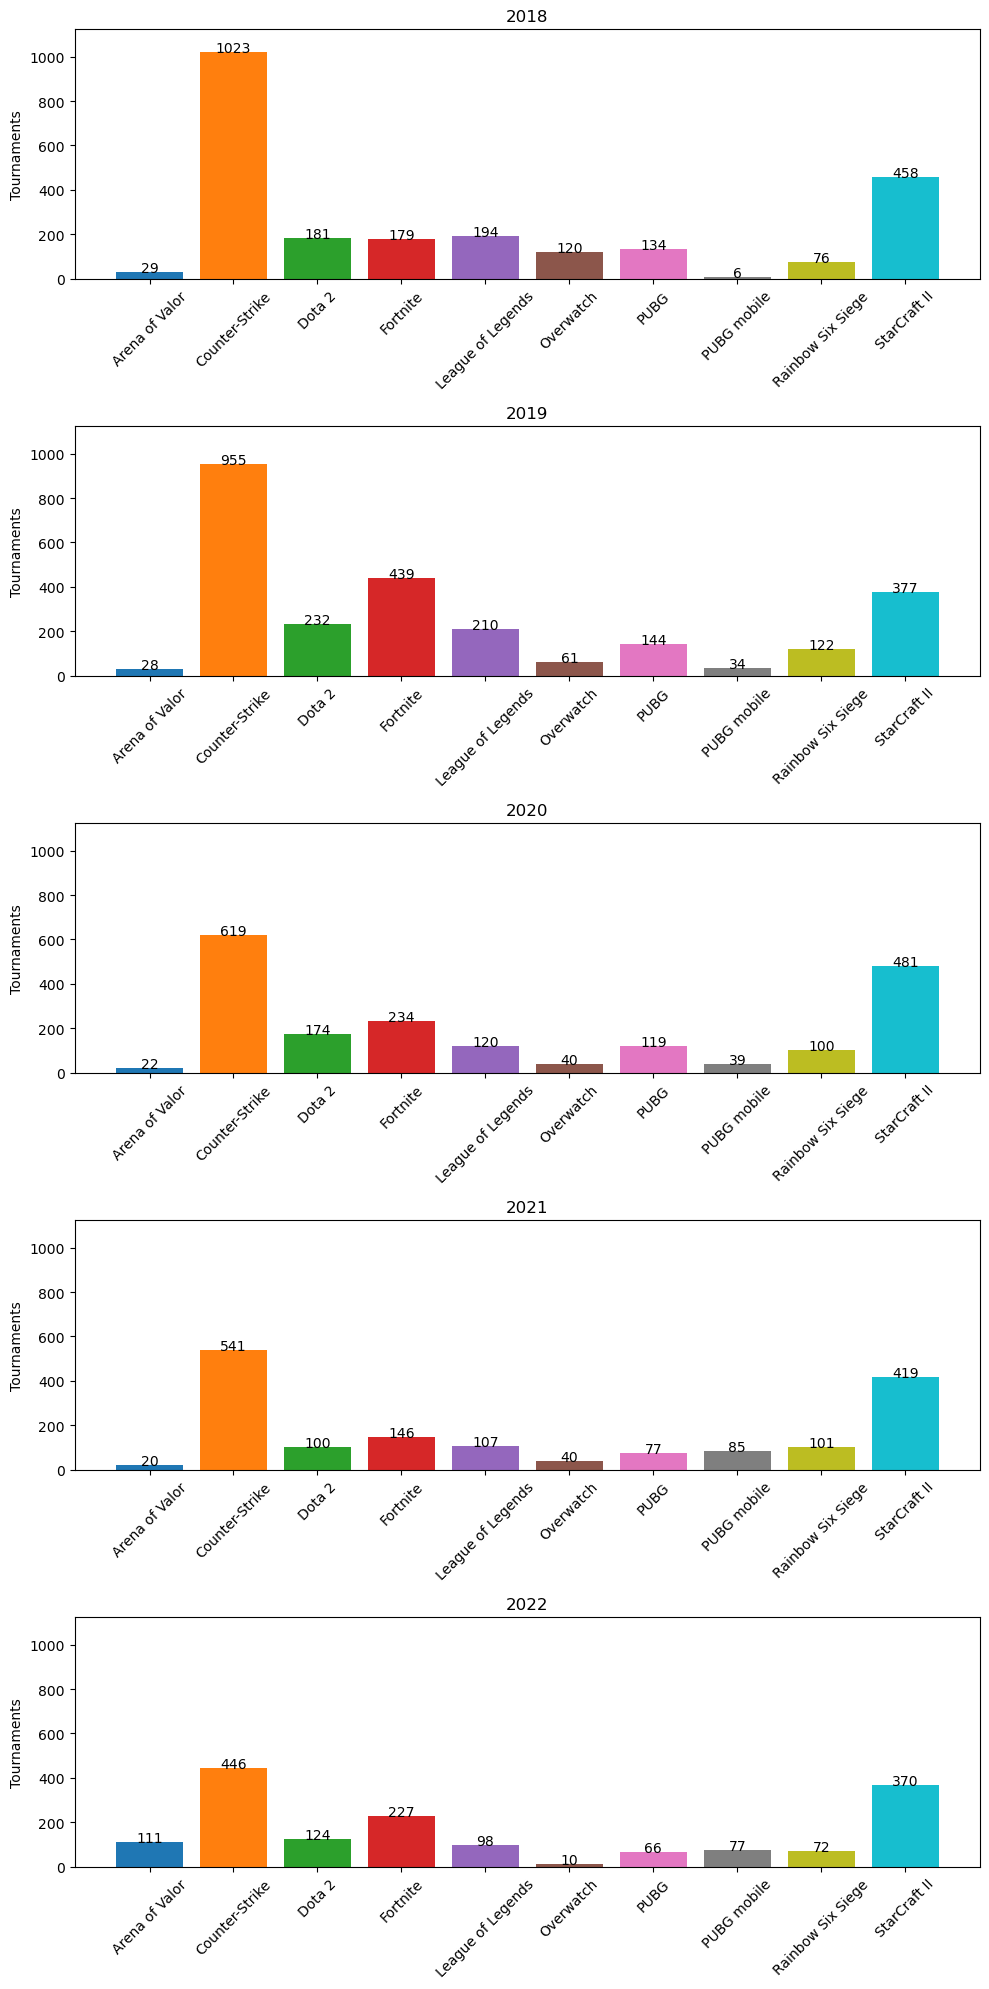

In [19]:
# Define a function to create bar plots 
def create_bar_plots(df):
    years = df['Year'].unique()
    num_years = len(years)
    
    plt.figure(figsize=(10, 20))
    
    color_palette = plt.get_cmap('tab10')  
    max_tournaments = df['Tournaments'].max()
     
    for i, year in enumerate(years):
        plt.subplot(num_years, 1, i+1)
        year_data = df[df['Year'] == year]
        game_names = year_data['Game']
        num_tournaments = year_data['Tournaments']
        width = 0.8
        colors = color_palette(range(len(game_names)))
        
        # Creating the bar plot
        bars = plt.bar(game_names, num_tournaments, width=width, color=colors)
        plt.bar(game_names, num_tournaments, width=width, color=colors)
        plt.ylabel('Tournaments')
        plt.title(str(year))
        plt.xticks(rotation=45)
        plt.ylim(0, max_tournaments+100)
        
        for bar, num in zip(bars, num_tournaments):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), num,
                     ha='center', va='baseline')
        
        
    plt.tight_layout()
    plt.show()
    
create_bar_plots(years_18_22)

From the bar plots we can learn the following trends :
- In **2019**, there is a **correlation** with the **earnings** line plots. Most of the games had more tournaments, which correlates with the observation that these games earned more. Additionally, the games that earned less showed a decrease in the number of tournaments.
- In **2020**, there is also a **correlation** with the earnings. All games, except PUBG Mobile and StarCraft II, showed a **decrease** in the number of tournaments. An interesting insight is that StarCraft II had more tournaments than in 2018, but earned only half the amount.
- Another interesting observation is what happened in **2021**. Although the earnings showed **recovery**, most of the games continued to **drop** in the number of tournaments. This suggests that the industry, post-pandemic, changed its approach and held fewer tournaments with larger prize pools.
- In **2022**, the trend is similar to the previous year. Most games held fewer tournaments, but the earnings didn't show a significant change. This indicates that the prizes per tournament grew, but there were fewer tournaments held overall.

These insights provide valuable information about the relationship between the number of tournaments and earnings in the last years, highlighting the **evolving dynamics** of the industry.

#### 5. Total Earnings by Genre 

Now, let's explore the total earnings (in USD) for each genre.

In [20]:
# Print a list of genres 
print("The number of genres: " + str(games_earning['Genre'].nunique()))
print(games_earning['Genre'].unique())


The number of genres: 12
['FPS' 'Strategy' 'Sports' 'Fighting Game' 'Racing' 'MOBA' 'RPG Game'
 'TPS' 'Collectible Card Game' 'Puzzle Game' 'Battle Royale'
 'Music / Rhythm Game']


In [21]:
# Calculating earnings per genre
earnings_by_genre = games_earning_pivot[['Genre', 'Earnings']].groupby('Genre').sum().sort_values('Earnings', ascending = False)
earnings_by_genre.reset_index(inplace=True)

print(earnings_by_genre)

                    Genre  Earnings
0                    MOBA     555.0
1                     FPS     356.0
2           Battle Royale     303.0
3                Strategy      85.0
4                  Sports      54.0
5   Collectible Card Game      43.0
6           Fighting Game      17.0
7                RPG Game      10.0
8                  Racing       8.0
9                     TPS       6.0
10    Music / Rhythm Game       0.0
11            Puzzle Game       0.0


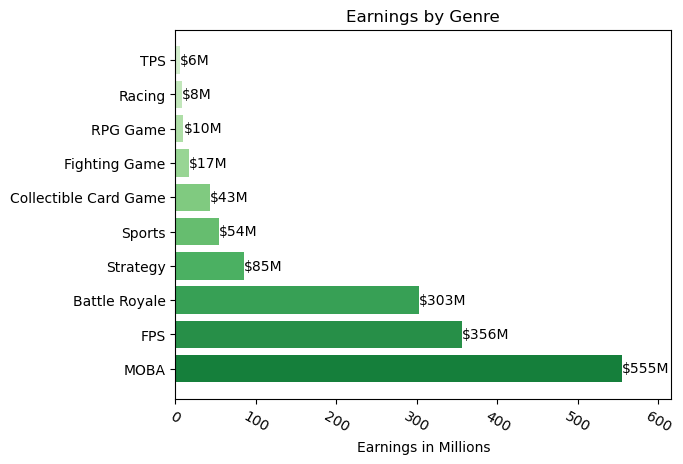

In [22]:
# Creating a horizontal bar chart

cmap = plt.cm.get_cmap('Greens')  
colors = cmap(np.linspace(0.8, 0.2, 10)) 

plt.barh(earnings_by_genre['Genre'].head(10), earnings_by_genre['Earnings'].head(10), color = colors)
plt.xlabel('Earnings in Millions')
plt.title('Earnings by Genre')
plt.xticks(rotation=-30)

for i, (genre, earnings) in enumerate(zip(earnings_by_genre['Genre'].head(10), earnings_by_genre['Earnings'].head(10))):
    plt.text(earnings, i, f"${earnings:.0f}M", ha='left', va='center')

plt.xlim(0, earnings_by_genre['Earnings'].head(10).max() * 1.11)
plt.show()

The genre earning the most in total is **MOBA** (Multiplayer Online Battle Arena), with a total of **\$555M**. The top games in this genre include Dota 2, League of Legends, and Arena of Valor.<br><br>
Following that, the **FPS** (First-Person Shooter) genre ranks second with a total of **\$356M**. Popular games in this genre are Counter-Strike, Rainbow Six Siege, and Overwatch. <br><br>
The **Battle Royale** genre secures the third position with a total of **$303M**, featuring games like Fortnite, PUBG, and PUBG Mobile. <br><br>
It is apparent that all of the **top 10 games** in terms of earnings belong to these leading genres, highlighting the **correlation** between genre popularity and earnings.


#### 6. Tournaments by Genre :

Next, let's see how many tournaments in total each genre held.

In [23]:
# Calculating total tournaments by genre
tournaments_by_genre = games_earning_pivot[['Genre', 'Tournaments']].groupby('Genre').sum().sort_values('Tournaments', ascending = False)
tournaments_by_genre.reset_index(inplace=True)
print(tournaments_by_genre)

                    Genre  Tournaments
0                     FPS        15130
1                Strategy        13498
2           Fighting Game        10619
3                    MOBA         6425
4                  Sports         4417
5           Battle Royale         2926
6   Collectible Card Game         1830
7                  Racing         1739
8                RPG Game          303
9                     TPS          278
10    Music / Rhythm Game          181
11            Puzzle Game           93


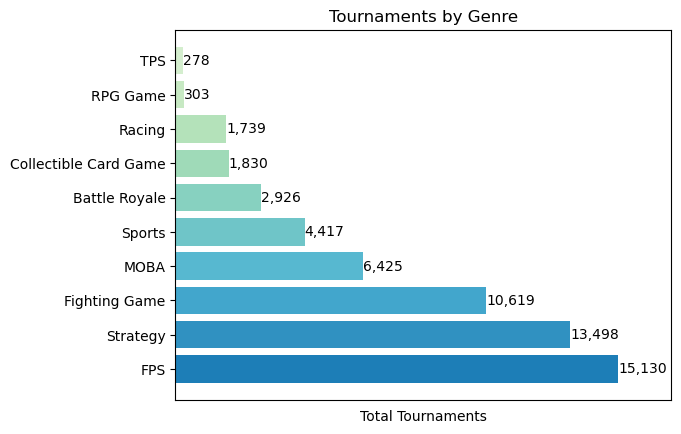

In [24]:
# Creating a horizontal bar chart

cmap = plt.cm.get_cmap('GnBu') 
colors = cmap(np.linspace(0.8, 0.2, 10)) 

plt.barh(tournaments_by_genre['Genre'].head(10) ,tournaments_by_genre['Tournaments'].head(10), color = colors)
plt.xlabel('Total Tournaments')
plt.title('Tournaments by Genre')
for i, (genre, Tournaments) in enumerate(zip(tournaments_by_genre['Genre'].head(10), tournaments_by_genre['Tournaments'].head(10))):
    formatted_tournaments = '{:,}'.format(Tournaments)
    plt.text(Tournaments, i, f"{formatted_tournaments}", ha='left', va='center')

plt.xlim(0, tournaments_by_genre['Tournaments'].head(10).max() * 1.12)
plt.xticks([])

plt.show()

**FPS** (First-Person Shooter) is the genre with the **highest** number of tournaments held. This can be attributed to its status as an old and established genre, with games like Counter-Strike released back in 2000.<br>

**Strategy** and **Fighting-game** genres have a **high** number of tournaments held but **low** earnings. This suggests that, apart from StarCraft II in the Strategy genre, the prize pools per tournament in these genres may be lower than in others.<br>

**MOBA** (Multiplayer Online Battle Arena) genre holds the fourth position in terms of tournaments held but leads in earnings. This can indicate that higher prize pools per tournament offered in this genre.<br>

An interesting insight is that **Battle Royale** genre, which held four times fewer tournamnets than FPS, earned almost the same amount.This genre gained popularity relatively late, with its popular games being released around 2017.<br>

Surprisingly, the **Sports** genre secures a spot in the top five, implying a genre with high number of tournaments but likely with smaller prize pools.

#### 7. Earning by Genre in the Last 5 Years

Lastly, let's explore genres' earnings (in USD) over the last five years

In [25]:
# Creating top 5 genres list
top_genres = tournaments_by_genre['Genre'].head(5)  

# Calculating genres' earnings per year
genre_by_year = games_earning_pivot[(games_earning_pivot['Year'] >= 2018) & (games_earning_pivot['Year'] <= 2022) & (games_earning_pivot['Genre'].isin(top_genres))].groupby(['Genre', 'Year'])['Earnings'].sum().reset_index()
print(genre_by_year)

            Genre  Year  Earnings
0             FPS  2018      42.0
1             FPS  2019      46.0
2             FPS  2020      45.0
3             FPS  2021      61.0
4             FPS  2022      54.0
5   Fighting Game  2018       1.0
6   Fighting Game  2019       4.0
7   Fighting Game  2020       1.0
8   Fighting Game  2021       2.0
9   Fighting Game  2022       1.0
10           MOBA  2018      71.0
11           MOBA  2019      69.0
12           MOBA  2020      30.0
13           MOBA  2021      81.0
14           MOBA  2022      90.0
15         Sports  2018       7.0
16         Sports  2019       8.0
17         Sports  2020       7.0
18         Sports  2021       8.0
19         Sports  2022      15.0
20       Strategy  2018       5.0
21       Strategy  2019       6.0
22       Strategy  2020       9.0
23       Strategy  2021      11.0
24       Strategy  2022      14.0


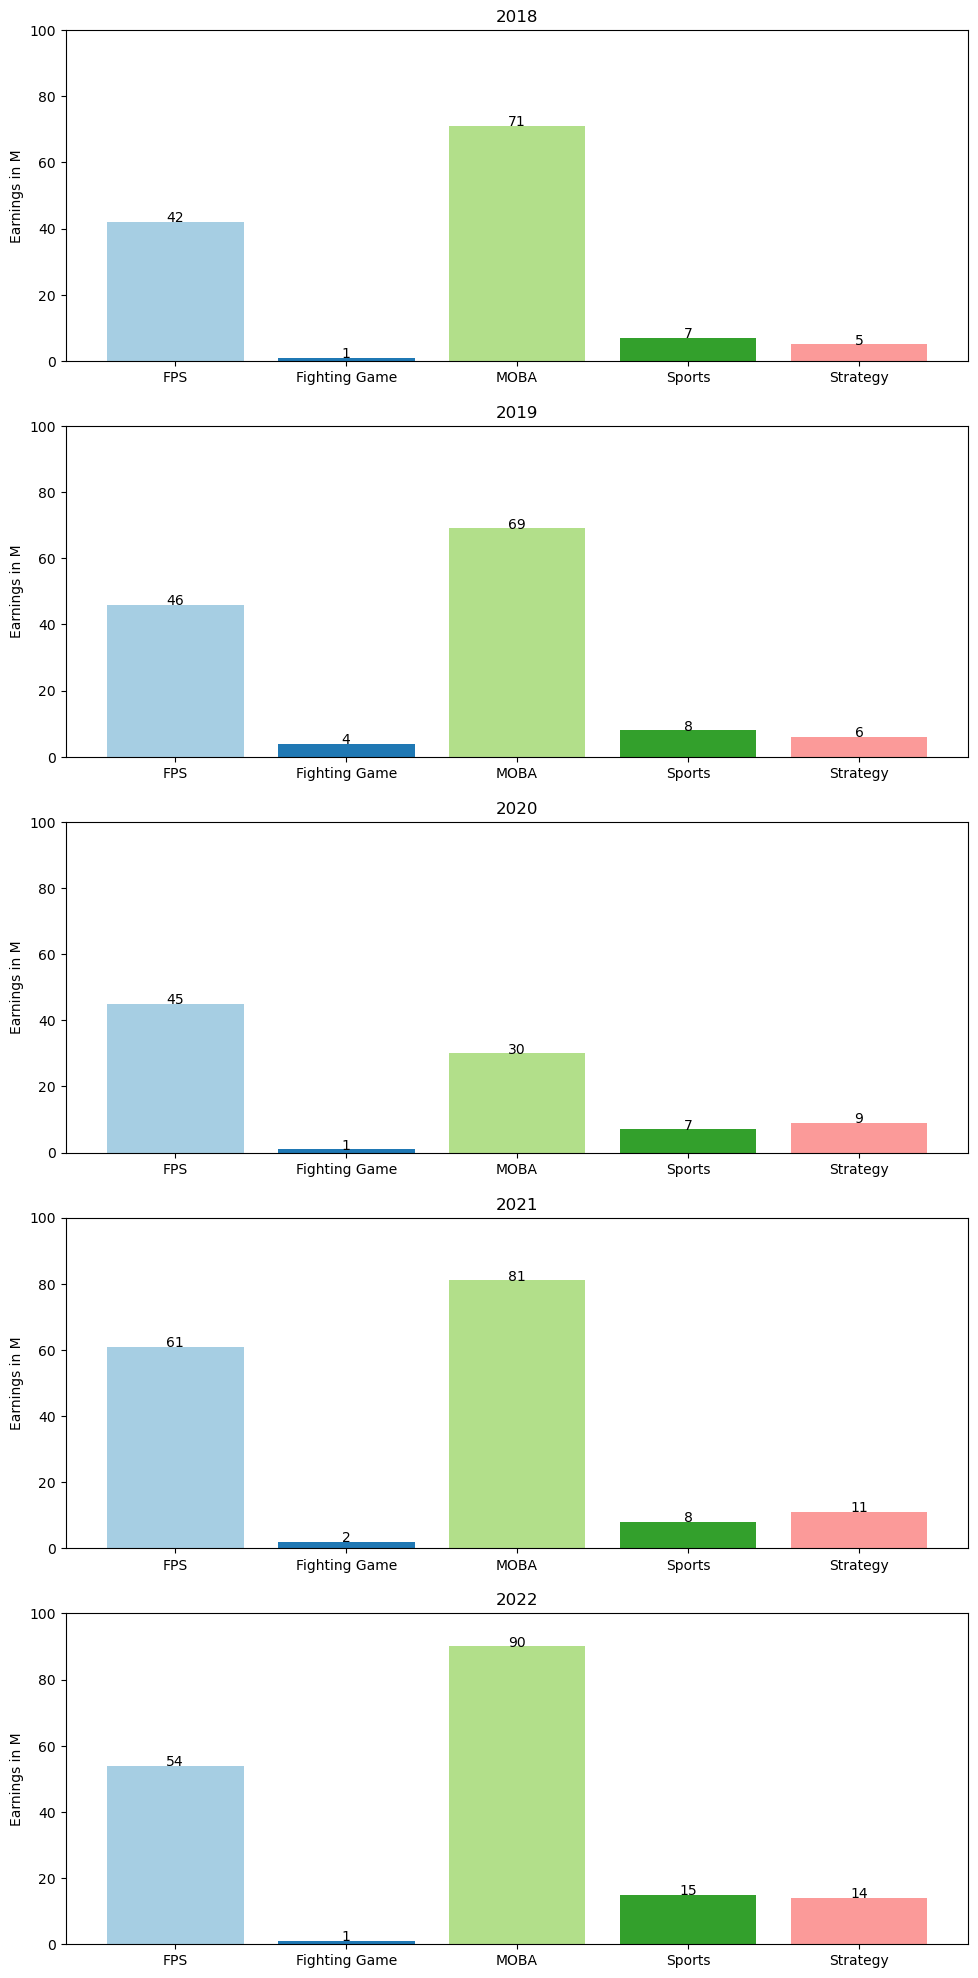

In [26]:
# Define a function to create bar plots
def year_bar_plots(df):
    years = df['Year'].unique()
    num_years = len(years)
    
    plt.figure(figsize=(10, 20))
    
    color_palette = plt.get_cmap('Paired')  
    max_earnings = df['Earnings'].max()
    
    for i, year in enumerate(years):
        plt.subplot(num_years, 1, i+1)
        year_data = df[df['Year'] == year]
        genre_names = year_data['Genre']
        earnings = year_data['Earnings']
        width = 0.8
        colors = color_palette(range(len(genre_names)))
        
        # Creating the bar plot
        bars = plt.bar(genre_names, earnings, width=width, color=colors)
        plt.bar(genre_names, earnings, width=width, color=colors)
        plt.ylabel('Earnings in M')
        plt.title(str(year))
        plt.xticks(rotation=0)
        
        for bar, num in zip(bars, earnings):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(num),
                     ha='center', va='baseline')
        
        plt.ylim(0, max_earnings+10)
  
    plt.tight_layout(pad=1.5)
    plt.show()
    
year_bar_plots(genre_by_year)

From the bar plots we can learn the following insights : 

- **MOBA, Sports, and strategy** show an increase in earnings, reaching their **highest** earnings in **2022**.

- **FPS** genre show consistent **growth** from **2018 to 2021** but a slight **decrease** in **2022**. However, the difference is relatively small as this genre still earned considerably more than most others.

- **Fighting-Game** genre show **no clear trend**, with earnings Shifting between higher and lower values. The genre reached its peak earnings in 2019, and in 2022 it remained the same as in 2018.

## conclusions : 

1. In conclusion, the findings show a remarkable growing industry that attracts interest worldwide.
2. The analysis over the last five years has provided valuable insights into the relationship between genres, tournaments, and earnings.
3. The data has revealed interesting trends, such as the dominance of certain games and genres in terms of earnings and the varying number of tournaments held. 
4. This project is likely to serve as a valuable resource for industry stakeholders, game developers, or Esports enthusiasts, providing a comprehensive overview of the Esports economy and its trends.

**Thank you for reading**